### Problem statement
We have to perform EDA on loan dataset, so that we can identify most occurrence of loan defaults. By our EDA business can plan better loan offers so that they can reduce the financial loss (called credit loss).

#### Import required packages

In [6]:
import pandas as pd
import numpy as num

In [104]:
print(pd.__version__)
print(num.__version__)

1.3.4
1.20.3


In [13]:
loan_details = pd.read_csv("loan.csv")

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
loan_details.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Total no. of records

In [19]:
loan_details.shape

(39717, 111)

## Clean data

In [20]:
loan_details=loan_details.iloc[:,0:49]

In [21]:
loan_details.shape

(39717, 49)

In [22]:
loan_details.term = loan_details.term.apply(lambda x:x.replace(' months',''))

In [23]:
loan_details.term=loan_details.term.astype('int64')

In [24]:
loan_details.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [25]:
loan_details.int_rate = loan_details.int_rate.apply(lambda x:float(x[:-1]))

In [27]:
loan_details.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

#### Total no. defaulted records

In [28]:
loan_details[loan_details.loan_status == 'Charged Off'].shape[0]

5627

Create a defaulted dataframe

In [29]:
defaulters_details = loan_details[loan_details.loan_status.isin(['Charged Off'])]

In [30]:
loan_details.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_deli

## <font color='#0f96db'>Let's see few Univariate analysis</font>

### <font color='#d75700'>Count plot for loan status</font>

##### imports which are required

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
print(sns.__version__)

0.11.2


In [40]:
loan_details.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

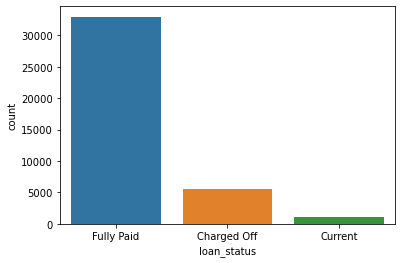

In [33]:
sns.countplot(x='loan_status',data=loan_details)
plt.show()

###### From above count plot we can not derive any conclusive decisions. But here we get to know that most of the loans are fully paid.

### <font color='#d75700'>Count plot for emp_length</font>

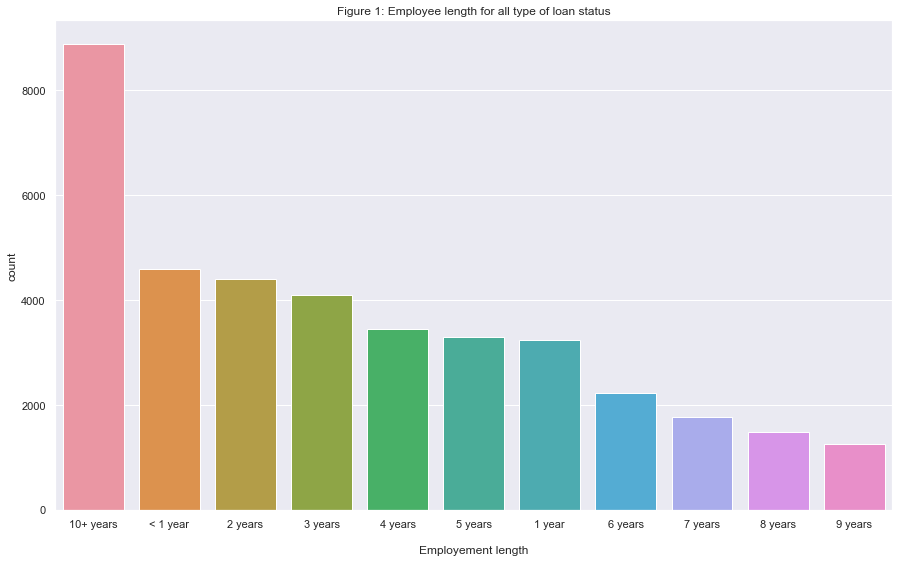

In [41]:
sns.countplot(x='emp_length', order=loan_details.emp_length.value_counts().index, data=loan_details)
sns.set(rc={'figure.figsize':(15,9)})
plt.title("Figure 1: Employee length for all type of loan status")
plt.xlabel('\nEmployement length')
plt.show()

###### Above count plot is plotted for all type of loan status. From above count plot we can not derive any conclusive decisions. But here we get to know  person/business which has 10+ years of employement length are more than any other lengths.

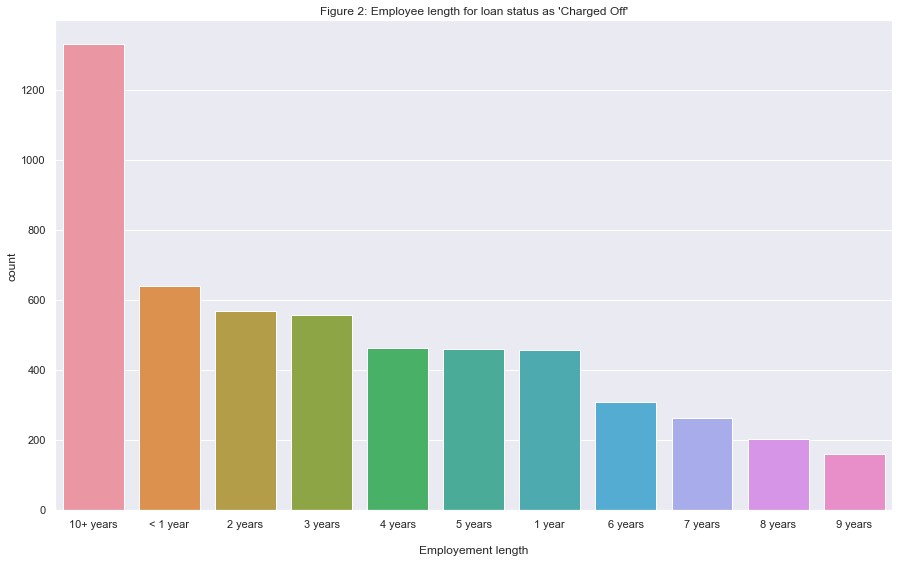

In [42]:
sns.countplot(x='emp_length', order=defaulters_details.emp_length.value_counts().index, data=defaulters_details)
sns.set(rc={'figure.figsize':(15,9)})
plt.title("Figure 2: Employee length for loan status as 'Charged Off'")
plt.xlabel('\nEmployement length')
plt.show()

###### Above count plot is plotted for "Charged of" loan status. From above count plot we get to know most of the defaulters have 10+ years of employement length.

### <font color='#d75700'>Hist plot defaulted loan</font>

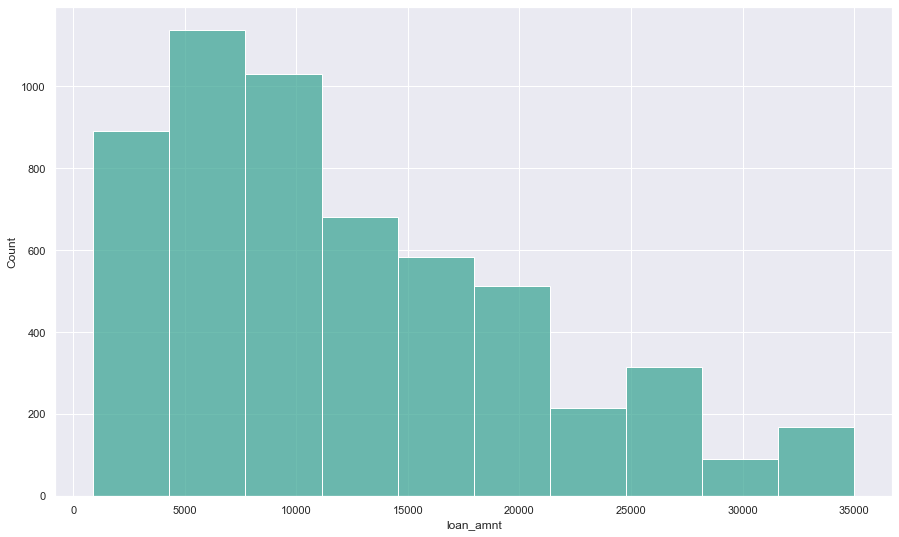

In [52]:
sns.histplot(defaulters_details.loan_amnt,bins=10,color='#3FA796')
plt.show()

In [44]:
defaulters_details.loan_amnt.describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

###### Above hist plot is plotted for "Charged of" loan status. From above hist plot we get to know most of the defaulters loan amount ranges from 900 to 15000

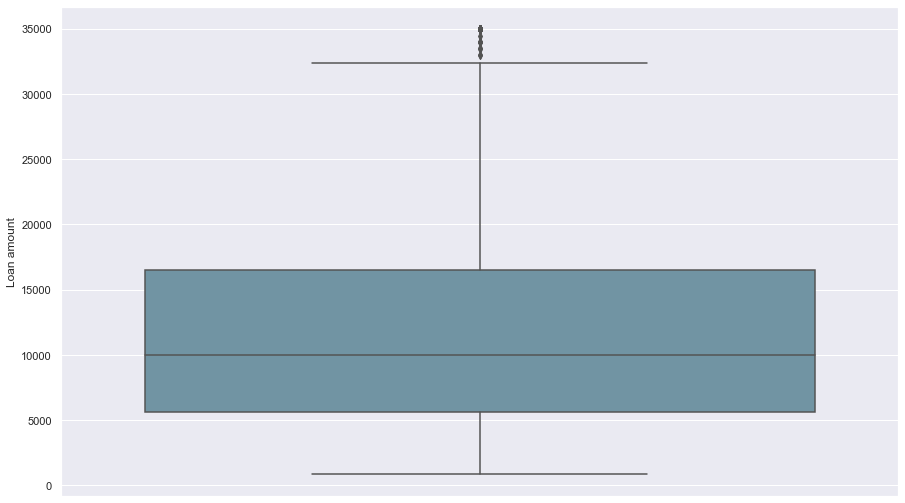

In [53]:
sns.boxplot(y='loan_amnt',data=defaulters_details,color='#6998AB')
plt.ylabel("Loan amount")
plt.show()

##### Above box gives us little clarity on the loan amount spread out. Q1 as per above plot is 5600, median is 10000 and Q3 is 16500. Most defaulters lie between 5600 to 10000 loan amount

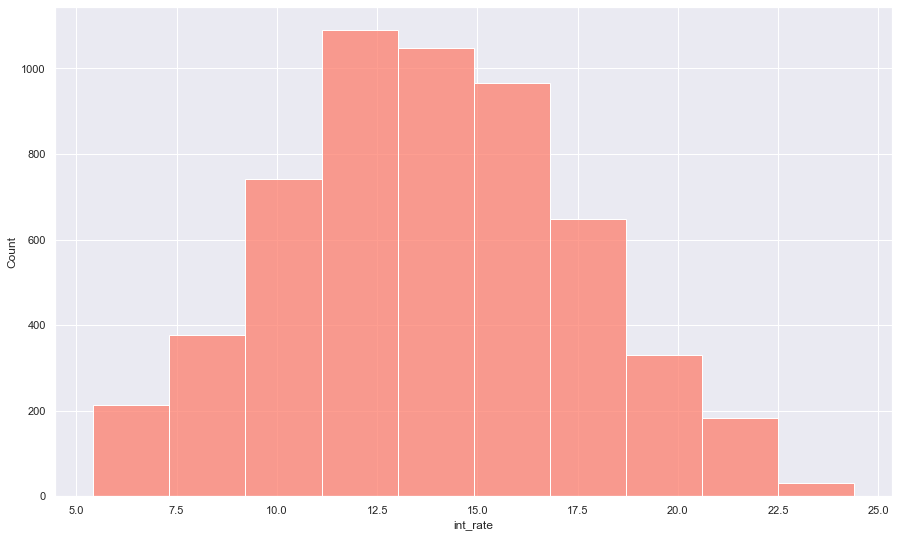

In [51]:
sns.histplot(defaulters_details.int_rate,bins=10,color='#FE7E6D')
plt.show()

##### Above hist gives us little clarity that most defaulters lie between interest rate from 10% to 17.5%. So higher the interest rate more the chance of defaulting. 

In [ ]:
def gradetonum(grade):
    grade_dic = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
    return int(grade_dic[grade])


defaulters_details['grade'] = defaulters_details.grade.apply(lambda x:gradetonum(x))

C:\Users\sdroc\AppData\Local\Temp/ipykernel_19152/428041594.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  his.set(xticklabels=['0','A','B','C','D','E','F','G'])


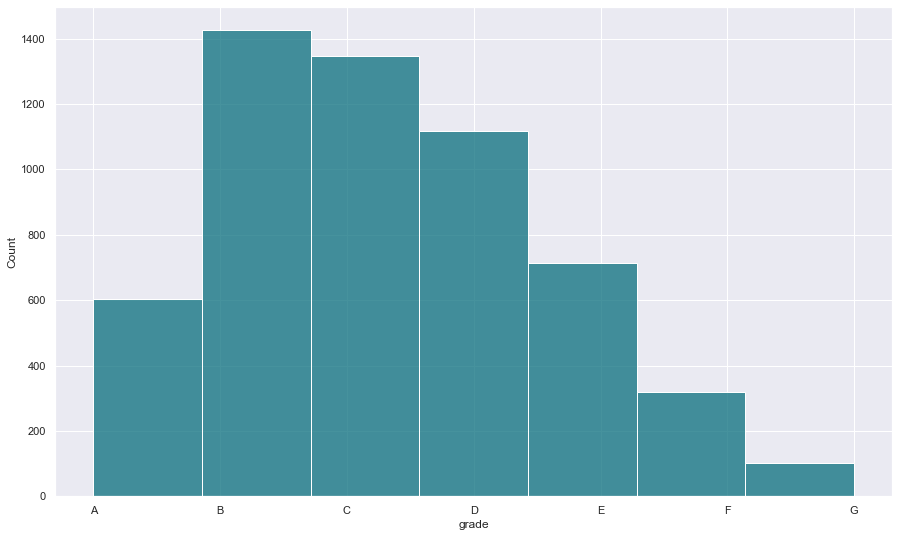

In [101]:
his = sns.histplot(defaulters_details.grade,bins=7,color='#086E7D')
his.set(xticklabels=['0','A','B','C','D','E','F','G'])
plt.show()

## <font color='#0f96db'>Let's see few Bivariate analysis</font>

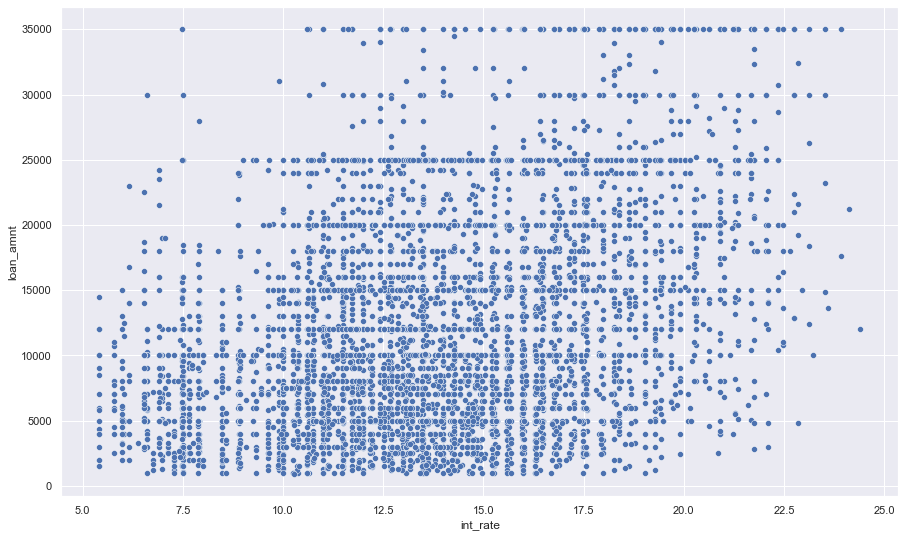

In [55]:
sns.scatterplot(data=defaulters_details,x='int_rate',y='loan_amnt')
plt.show()

##### Above scatter plot is for loan amount(y axis) and interest rate(x axis) for defaulters. From it we get to know that a loan defaulters cluster is getting created for loan amount between 2500 to 10000 and where interest range lies between 10.0% to 15.0%.

In [78]:
defaulters_details.grade.value_counts()

B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64

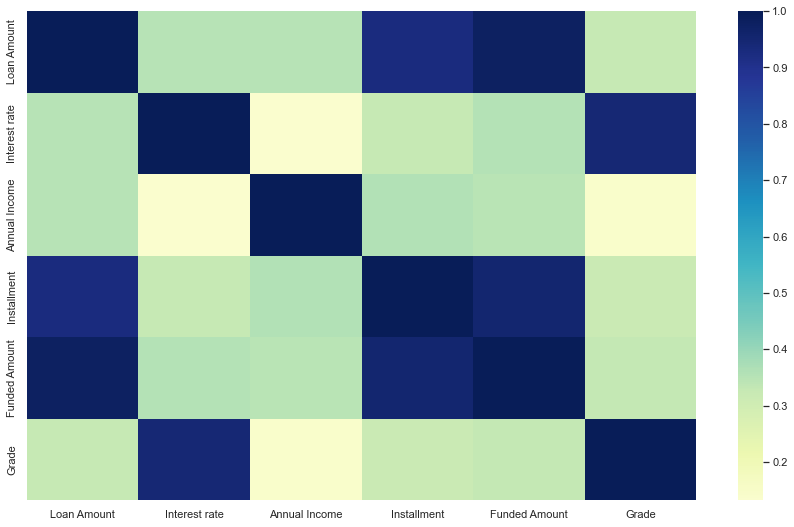

In [92]:
heat_map = sns.heatmap(defaulters_details[['loan_amnt','int_rate','annual_inc','installment','funded_amnt','grade']].corr(),cmap='YlGnBu',center=0.55,yticklabels=['Loan Amount','Interest rate', 'Annual Income','Installment','Funded Amount','Grade'],xticklabels=['Loan Amount','Interest rate', 'Annual Income','Installment','Funded Amount','Grade'])
plt.show()

##### Above heatmap denotes correlation between loan amount Loan amount, interest rate, annual income, installment and funded amount. Darker the block higher correlation. From above heat map we get to know below attribute have more correlation in loan defaualters: 
<ul><li>loan amount and installment</li>
<li>loan amount and funded amount</li>
<li>installment and funded amount</li>
<li>interest rate and grade</li></ul>